<a href="https://colab.research.google.com/github/thanhnt19146391/thanhnt19146391/blob/main/CNN_Execises/Face_detection/Step2_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
# Import packages
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
def make_some_noise():
    # Play an audio 
    from google.colab import output
    output.eval_js('new Audio("https://www.soundjay.com/nature/sounds/rain-01.mp3").play()')

In [4]:
def upload_files():
    # Upload file from computer to Colab
    from google.colab import files
    uploaded = files.upload()

# Declare

In [2]:
PATH = "/content/drive/MyDrive/Colab Notebooks/AI/CNN_Execises/Face_detection/"

CLASS = [
    "Someone",
    "Thanh",
    "Loi",
    "Bi",
    "Vinh",
    "Duc",
    "Dung",
    "Shark Hung",
    "Shark Binh",
    "Shark Phu",
    "Shark Louis",
    "Shark Dzung",
    "Shark Linh",
    "Shark Viet",
    "Shark Lien",
    "Do Mixi",
    "Xemesis",
    "Bo",
    "Thuy Tien",
    "Tieu Vy",
    "My Tam"
]

In [5]:
def Read_datasets():

    images = []
    values = []
    for key in CLASS:
        value = CLASS.index(key)
        for filename in glob.glob(PATH + 'train/' + key + '_formated/*.jpg'):
            # print(filename)
            img = load_img(
                filename,
                target_size = (150, 150)
            )
            images.append(img)     
            values.append([value])     

    # Convert list to array
    images = np.array(images)
    values = np.array(values)

    # Create a random permutarion of the indices
    shuffled_indices = np.random.permutation(len(images)) #return a permutation of the indices

    print(f"shuffled indices: {shuffled_indices}")

    # Shuffle 2 array
    images = images[shuffled_indices]
    values = values[shuffled_indices]

    # Join a array along new axis
    images = np.stack(images, axis = 0)
    values = np.stack(values, axis = 0)

    # print(images.shape)
    # print(values.shape)

    # Convert array to tuple
    data = (images, values)

    return data

In [6]:
# Read data
x_data, y_data = Read_datasets()

# Split train data and test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape) 
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape) 

for i in range(0, 5):
    plt.imshow(x_test[i])
    plt.show()
    print(y_test[i])

KeyboardInterrupt: ignored

In [ ]:
def format_input_data(data):
    data = data.astype('float32')
    data /= 255
    return data

In [ ]:
def format_output_data(data):
    data = np_utils.to_categorical(data)
    return data

In [ ]:
# format datasets
x_train = format_input_data(x_train)
x_test = format_input_data(x_test)
y_train = format_output_data(y_train)
y_test = format_output_data(y_test)

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

# Build model

In [ ]:
def build_model1(input_shape, num_class):
    model = Sequential()

    # 1st block
    model.add(Conv2D(32, (3,3), padding='same',
    input_shape=input_shape, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    # 2nd block
    model.add(Conv2D(64, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # 3rd block
    model.add(Conv2D(128, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    # # 4th block
    model.add(Conv2D(256, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same',
    activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    # dense
    model.add(Flatten())
    model.add(
        Dense(
            512,
            activation = 'relu',
            kernel_initializer = "he_uniform"
        )
    )
    model.add(Dense(num_class, activation='softmax'))
    
    model.summary()
    return model

# Train model

In [ ]:
def train_model1(model):
    opt = SGD(
        lr = 0.01, 
        momentum = 0.9
    )
    model.compile(
        loss='categorical_crossentropy',
        optimizer = Adam(),
        metrics=['accuracy']
    )
    # train
    batch_size = 64
    global x_train, y_train, x_test, y_test
    history = model.fit(
        x_train, y_train, 
        batch_size = batch_size,
        epochs = 50, 
        validation_data = (x_test, y_test)
    )
    score = model.evaluate(
        x_test, y_test, 
        batch_size=batch_size
    )
    print("\nTest score:", score[0])
    print('Test accuracy:', score[1])
    return history

In [ ]:
def plot_history(history):
    model_history = pd.DataFrame(history.history)
    # model_history.head(None)

    # Add column 'epoch'
    model_history['epoch'] = history.epoch
    # model_history.head(None)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    num_epochs = model_history.shape[0]

    ax1.plot(np.arange(0, num_epochs), model_history["accuracy"], 
            label="Training accuracy")
    ax1.plot(np.arange(0, num_epochs), model_history["val_accuracy"], 
            label="Validation accuracy")
    ax1.legend()
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.set_title('Accuracy')
    ax2.set_title('Loss')
    ax2.plot(np.arange(0, num_epochs), model_history["loss"], 
            label="Training loss")
    ax2.plot(np.arange(0, num_epochs), model_history["val_loss"], 
            label="Validation loss")
    ax2.legend()
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    plt.tight_layout()
    plt.show()

# Training

In [ ]:
# model = build_model1((150, 150, 3), 21)
# hist = train_model1(model)
# make_some_noise()
# plot_history(hist)
# # Save model
# model.save("CNN_FaceDetection_model1_.h5")

In [5]:
# Save model
model.save(PATH + "CNN_FaceDetection_model1_87.h5")

NameError: ignored

In [6]:
model = load_model(PATH + "CNN_FaceDetection_model1_87.h5")

In [7]:
upload_files()

Saving SH1.jpg to SH1.jpg


Confidence:  50.051361322402954


'Shark Hung'

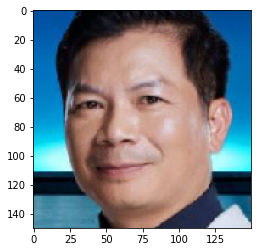

In [8]:
filename = 'SH1.jpg'
img = load_img(
    filename,
    target_size = (150, 150)
)
plt.imshow(img)
# print(type(img))
img = img_to_array(img)
# print(img.shape)
img = img.reshape(1, 150, 150, 3)
img = img.astype("float32")
img /= 255
prediction = model.predict(img)
# print(prediction)
confidence = np.max(prediction)
print("Confidence: ",confidence * 100)
index = np.argmax(prediction, axis = 1)[0] 
CLASS[index]